<center><img src='https://raw.githubusercontent.com/Jangrae/img/master/title.png' width=500/></center>

<center><img src='https://raw.githubusercontent.com/Jangrae/img/master/practice3.png' width=300/></center>

<center>본 실습에서 요구하는 내용 외에도 다양한 내용을 스스로 추가하여  탐색하고 분석해 보기를 권고합니다.</center>

# 전국 아파트 평균 매매가격

<img src='https://raw.githubusercontent.com/Jangrae/img/master/apart.png' width="650" align="left">

## 1.환경 설정

- 데이터 탐색과 전처리를 하기 전 라이브러리와 파일을 읽어옵니다.
- 시각화에 한글이 포함된 경우 이에 대한 설정을 진행합니다.

**1) 한글 설정**

- Jupyter Notebook 시각화에 한글이 표시되게 설정합니다.

In [130]:
# 라이브러리 불러오기
import matplotlib 
import matplotlib.pyplot as plt

# 폰트설정 - matplotlib 한글폰트
matplotlib.font_manager._rebuild()
plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

**2) 라이브러리 불러오기**

- 사용할 라이브러리를 불러옵니다.

In [131]:
# 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 차트가 고해상도로 보이게 설정
%config InlineBackend.figure_format = 'retina'

**3) 데이터 읽어오기**

- 다음 경로의 파일을 읽어와 apart 데이터프레임을 만드세요.
- 파일 경로: 'https://raw.githubusercontent.com/Jangrae/csv/master/apart_price.csv
- 단축 경로: 'https://bit.ly/ApartFile'
- Decoding 오류가 발생하면 encoding='CP949' 옵션을 지정해 읽어옵니다.

In [158]:
# 데이터 읽어오기
path = 'https://bit.ly/ApartFile'
apart = pd.read_csv(path, encoding='CP949')

## 2.데이터 탐색

다음과 같은 정보 확인을 통해 처리할 대상 데이터를 이해합니다.
- 상/하위 데이터 확인
- 데이터프레임 크기 확인
- 열 이름, 데이터 형식, 값 개수 등 확인
- 기초 통계정보 확인
- 결측치 확인
- 범주형 데이터 확인
- 개별 열 값 상세 확인 등

**1) 상/하위 데이터 확인**

- 상/하위 데이터를 확인합니다.

In [160]:
# 상위 5개 행 확인
apart.head()

,지역1,지역2,2020-08,2020-09,2020-10,2020-11,2020-12,2021-01,2021-02,2021-03,2021-04,2021-05,2021-06,2021-07
0,서울,종로구,1029542,1033625,1036486,1036681,1037986,1039903,1041444,1044347,1045819,1047819,1048722,1050750
1,서울,중구,802257,806143,807771,808743,809900,812157,814614,820100,822257,823314,824371,829486
2,서울,용산구,1399354,1406439,1411232,1412659,1413768,1416951,1421012,1427366,1430780,1434768,1439390,1445073
3,서울,성동구,910716,916402,918667,920020,921108,923402,927029,934049,938029,940000,942235,947157
4,서울,광진구,1021037,1025866,1029256,1030878,1032220,1034524,1038378,1047439,1053024,1056524,1059476,1063805


In [161]:
# 하위 5개 행 확인
apart.tail()

,지역1,지역2,2020-08,2020-09,2020-10,2020-11,2020-12,2021-01,2021-02,2021-03,2021-04,2021-05,2021-06,2021-07
182,경남,밀양시,126455,126261,125989,125727,125773,125625,125977,126977,127614,127932,128364,129125
183,경남,거제시,155274,155921,156366,156543,156165,155616,156555,157811,159494,160220,160549,161079
184,경남,양산시,172574,172582,172828,173383,174672,181445,187973,191410,194660,197867,201191,204215
185,제주,제주시,303871,303757,303757,303800,303771,304414,306314,308871,310943,313814,324614,344400
186,제주,서귀포시,223087,222696,222196,221685,221457,221500,222043,222913,223370,224065,224913,231457


**2) 열 데이터 형식, 값 개수 확인**

- 어떤 열이 있고, 맻 개의 값들을 갖는지, 데이터 형식은 어떠한 지 확인합니다.

In [162]:
# 열 정보 확인
apart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   지역1      187 non-null    object
 1   지역2      187 non-null    object
 2   2020-08  187 non-null    int64 
 3   2020-09  187 non-null    int64 
 4   2020-10  187 non-null    int64 
 5   2020-11  187 non-null    int64 
 6   2020-12  187 non-null    int64 
 7   2021-01  187 non-null    int64 
 8   2021-02  187 non-null    int64 
 9   2021-03  187 non-null    int64 
 10  2021-04  187 non-null    int64 
 11  2021-05  187 non-null    int64 
 12  2021-06  187 non-null    int64 
 13  2021-07  187 non-null    int64 
dtypes: int64(12), object(2)
memory usage: 20.6+ KB


**3) 결측치 확인**

- 결측치가 있는 지 확인합니다.

In [163]:
# 결측치 확인
apart.isnull().sum()

지역1        0
지역2        0
2020-08    0
2020-09    0
2020-10    0
2020-11    0
2020-12    0
2021-01    0
2021-02    0
2021-03    0
2021-04    0
2021-05    0
2021-06    0
2021-07    0
dtype: int64

In [164]:
# 기초통계정보 확인
apart.describe()

,2020-08,2020-09,2020-10,2020-11,2020-12,2021-01,2021-02,2021-03,2021-04,2021-05,2021-06,2021-07
count,1.870000e+02,1.870000e+02,1.870000e+02,1.870000e+02,1.870000e+02,1.870000e+02,1.870000e+02,1.870000e+02,1.870000e+02,1.870000e+02,1.870000e+02,1.870000e+02
mean,3.429660e+05,3.456397e+05,3.478531e+05,3.492826e+05,3.518816e+05,3.563870e+05,3.603933e+05,3.653163e+05,3.688655e+05,3.723293e+05,3.757256e+05,3.816681e+05
std,2.835917e+05,2.855867e+05,2.868470e+05,2.873621e+05,2.880428e+05,2.892677e+05,2.912634e+05,2.942345e+05,2.956551e+05,2.972473e+05,2.991623e+05,3.030026e+05
min,7.837500e+04,7.837500e+04,7.818800e+04,7.820800e+04,7.825000e+04,7.814600e+04,7.812500e+04,7.818800e+04,7.831300e+04,7.812500e+04,7.820800e+04,7.833300e+04
25%,1.618390e+05,1.626765e+05,1.633895e+05,1.635535e+05,1.632735e+05,1.637785e+05,1.641690e+05,1.663785e+05,1.683925e+05,1.702530e+05,1.719605e+05,1.744370e+05
50%,2.469320e+05,2.493830e+05,2.500550e+05,2.523670e+05,2.529710e+05,2.557350e+05,2.577230e+05,2.612110e+05,2.661170e+05,2.703280e+05,2.763280e+05,2.807330e+05
75%,4.236115e+05,4.269300e+05,4.318980e+05,4.385925e+05,4.446290e+05,4.549485e+05,4.633750e+05,4.712285e+05,4.768195e+05,4.827720e+05,4.873345e+05,4.946470e+05
max,1.751014e+06,1.757795e+06,1.759164e+06,1.759747e+06,1.761322e+06,1.771322e+06,1.783411e+06,1.797521e+06,1.807781e+06,1.818192e+06,1.834199e+06,1.873390e+06


→ 지수법으로 표현되어 있어서 보기가 어렵다

**5) (추가) 기초통계정보 확인**

- 지수법을 생략하여 기초통계정보를 확인합니다.

In [165]:
# 기초통계정보 확인 - lambda
apart.describe().apply(lambda x: x.apply('{0:,.0f}'.format))

,2020-08,2020-09,2020-10,2020-11,2020-12,2021-01,2021-02,2021-03,2021-04,2021-05,2021-06,2021-07
count,187,187,187,187,187,187,187,187,187,187,187,187
mean,"342,966","345,640","347,853","349,283","351,882","356,387","360,393","365,316","368,865","372,329","375,726","381,668"
std,"283,592","285,587","286,847","287,362","288,043","289,268","291,263","294,235","295,655","297,247","299,162","303,003"
min,"78,375","78,375","78,188","78,208","78,250","78,146","78,125","78,188","78,313","78,125","78,208","78,333"
25%,"161,839","162,676","163,390","163,554","163,274","163,778","164,169","166,378","168,392","170,253","171,960","174,437"
50%,"246,932","249,383","250,055","252,367","252,971","255,735","257,723","261,211","266,117","270,328","276,328","280,733"
75%,"423,612","426,930","431,898","438,592","444,629","454,948","463,375","471,228","476,820","482,772","487,334","494,647"
max,"1,751,014","1,757,795","1,759,164","1,759,747","1,761,322","1,771,322","1,783,411","1,797,521","1,807,781","1,818,192","1,834,199","1,873,390"


**6) (추가) 고유값 개수 확인**

- 지역 이름에 중복된 값이 있는지 확인합니다.

In [167]:
# 지역1 고유값 개수 확인
apart['지역1'].value_counts()

경기    45
서울    25
부산    16
경북    13
경남    13
충남    12
인천     8
충북     8
대구     8
전북     8
강원     7
전남     6
울산     5
광주     5
대전     5
제주     2
세종     1
Name: 지역1, dtype: int64

In [168]:
# 지역2 고유값 개수 확인
apart['지역2'].value_counts()

남구     6
동구     6
중구     6
북구     5
서구     5
      ..
달성군    1
화성시    1
사하구    1
거제시    1
진해구    1
Name: 지역2, Length: 163, dtype: int64

## 3.데이터 전처리
전처리 과정에서 다음과 같은 처리를 할 수 있습니다.

- 결측치 처리
- 값 변경
- 열 추가
- 불필요한 열 제거
- 열 이름 변경
- 데이터 통합(연결 또는 조인)
- 가변수화 등

**1) 열 이름 변경**

- 지역1, 지역2 열 이름을 각각 '시도', '구군'으로 변경합니다.

In [169]:
# 열 이름 변경
cols = {'지역1':'시도', '지역2':'구군'}
apart.rename(columns=cols, inplace=True)

# 확인
apart.head()

,시도,구군,2020-08,2020-09,2020-10,2020-11,2020-12,2021-01,2021-02,2021-03,2021-04,2021-05,2021-06,2021-07
0,서울,종로구,1029542,1033625,1036486,1036681,1037986,1039903,1041444,1044347,1045819,1047819,1048722,1050750
1,서울,중구,802257,806143,807771,808743,809900,812157,814614,820100,822257,823314,824371,829486
2,서울,용산구,1399354,1406439,1411232,1412659,1413768,1416951,1421012,1427366,1430780,1434768,1439390,1445073
3,서울,성동구,910716,916402,918667,920020,921108,923402,927029,934049,938029,940000,942235,947157
4,서울,광진구,1021037,1025866,1029256,1030878,1032220,1034524,1038378,1047439,1053024,1056524,1059476,1063805


**2) 열 추가**

- 다음 공식을 사용해 '증가액', '증가율' 열을 추가합니다.

    - 증가액: 2021년 7월 가격 - 2020년 8월 가격
    - 증가율: (2021년 7월 가격 - 2020년 8월 가격) * 100 / 2020년 8월 가격

In [170]:
# apart 컬럼명 확인
apart.columns

Index(['시도', '구군', '2020-08', '2020-09', '2020-10', '2020-11', '2020-12',
       '2021-01', '2021-02', '2021-03', '2021-04', '2021-05', '2021-06',
       '2021-07'],
      dtype='object')

In [171]:
# 연간 증가액
apart['증가액'] = apart['2021-07'] - apart['2020-08']

# 연간 증가율
apart['증가율'] = ((apart['2021-07'] - apart['2020-08']) * 100) / apart['2020-08']

# 확인
apart.head()

,시도,구군,2020-08,2020-09,2020-10,2020-11,2020-12,2021-01,2021-02,2021-03,2021-04,2021-05,2021-06,2021-07,증가액,증가율
0,서울,종로구,1029542,1033625,1036486,1036681,1037986,1039903,1041444,1044347,1045819,1047819,1048722,1050750,21208,2.059945
1,서울,중구,802257,806143,807771,808743,809900,812157,814614,820100,822257,823314,824371,829486,27229,3.394050
2,서울,용산구,1399354,1406439,1411232,1412659,1413768,1416951,1421012,1427366,1430780,1434768,1439390,1445073,45719,3.267150
3,서울,성동구,910716,916402,918667,920020,921108,923402,927029,934049,938029,940000,942235,947157,36441,4.001357
4,서울,광진구,1021037,1025866,1029256,1030878,1032220,1034524,1038378,1047439,1053024,1056524,1059476,1063805,42768,4.188683


**3) 불필요한 열 제거**

- 시도, 구군, 증가액, 증가율 열만 추출하여 apart2 데이터프레임을 선언합니다.
- 이후 모든 작업은 apart2 데이터프레임을 대상으로 합니다.

In [172]:
# 분석 대상 열 지정
apart2 = apart[['시도', '구군', '증가액', '증가율']]

# 확인
apart2.head()

,시도,구군,증가액,증가율
0,서울,종로구,21208,2.059945
1,서울,중구,27229,3.394050
2,서울,용산구,45719,3.267150
3,서울,성동구,36441,4.001357
4,서울,광진구,42768,4.188683


## 4.데이터 분석

- 데이터를 집계하고 간단히 시각화하여 분석합니다.
- 연속형 값은 선 그래프, 범주형 값은 막대 그래프로 시각화함이 일반적입니다.

### 4.1.전국 분석

**1) 가격 변동 현황**

- 구군의 아파트 매매가 증가액을 막대 그래프로 시각화해 확인합니다.

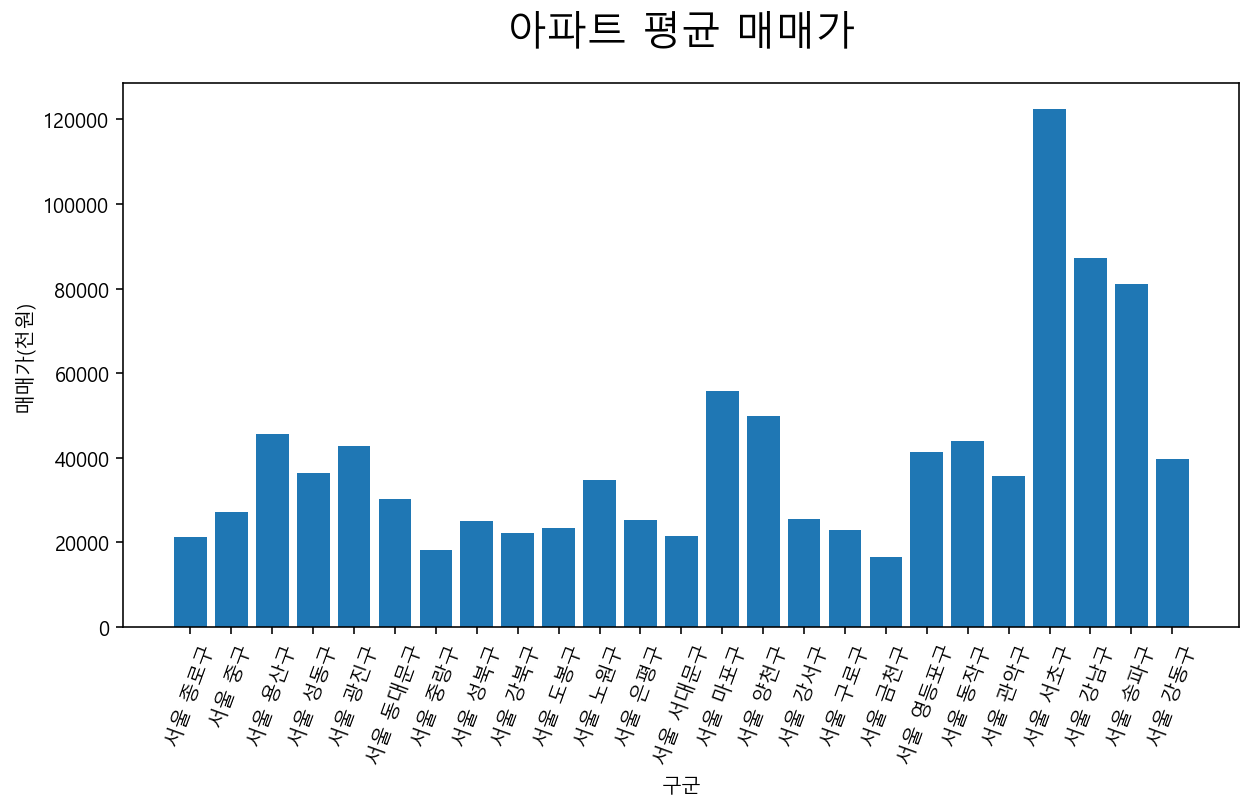

In [179]:
# 차트 그리기 - 25개만 먼저보기

tmp = apart.head(25)

# 그래프 크기
plt.figure(figsize=(10,5))

# 막대그래프
plt.bar(tmp['시도'] + ' ' + tmp['구군'], tmp['증가액'])

# 차트 제목
plt.title('아파트 평균 매매가', fontsize=20, pad=20)

# 라벨
plt.xlabel('구군')
plt.ylabel('매매가(천원)')

# x축 레이블 회전
plt.xticks(rotation=70)
# y축 레이블 회전
plt.yticks(rotation=0)

plt.show()

**2) 가격 변동 TOP 25**

- 증가액 기준으로 상위 25개 행을 추출해 tmp 데이터프레임을 선언합니다.

In [142]:
# 증가액 순 정렬
tmp = apart2.sort_values(by='증가액', ascending=False)

# 인덱스 초기화 & 1 번 부터 index 시작
tmp.reset_index(drop=True, inplace=True)
tmp.index=tmp.index+1

# 증가액 기준으로 상위 25개 행 추출해 tmp 데이터프레임을 선언
tmp = tmp.loc[ :25, ]

# 확인
tmp

,시도,구군,증가액,증가율
1,경기,동안구,144265,25.019033
2,경기,의왕시,141787,28.618515
3,대구,수성구,132345,25.655664
4,부산,해운대구,123977,30.789194
5,서울,서초구,122376,6.988865
6,경기,안양시,120878,22.304477
7,경기,과천시,108063,8.575013
8,인천,연수구,107033,23.328647
9,경기,분당구,104115,11.234421
10,경기,덕양구,101934,26.441543


- tmp 데이터프레임을 대상으로 구군별 매매가 증가액을 막대 그래프로 시각화해 확인합니다.

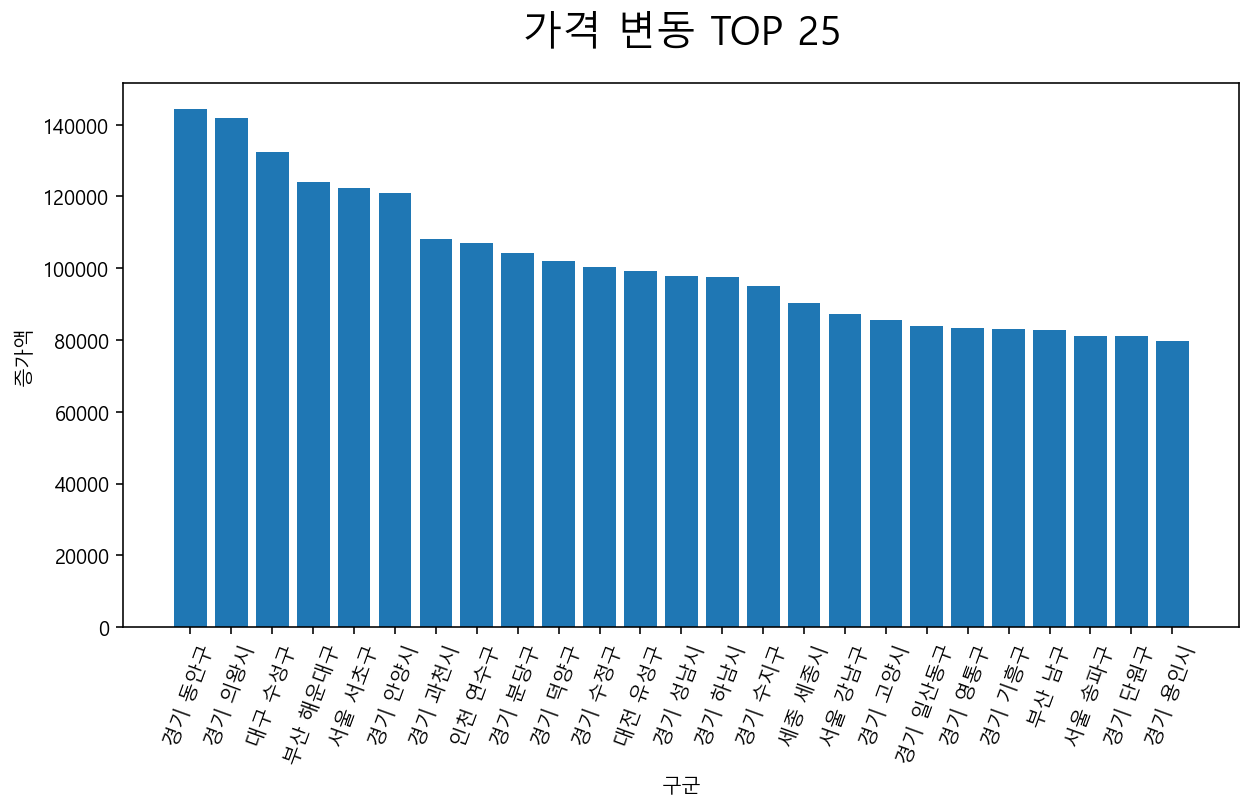

In [143]:
# 차트 그리기

# 그래프 크기
plt.figure(figsize=(10,5))

# 막대그래프
plt.bar(tmp['시도'] + ' ' + tmp['구군'], tmp['증가액'])

# 차트 제목
plt.title('가격 변동 TOP 25', fontsize=20, pad=20)

# 축의 tick 포멧 편집
plt.ticklabel_format(axis='y', style='plain')

# x축 레이블 회전 - x 축 값을 기울여 표시
plt.xticks(rotation=70) 

# 라벨
plt.xlabel('구군')
plt.ylabel('매매가(천원)')

plt.show()

**3) 가격 변동 BOTTOM 25**

- 증가액 기준으로 하위 25개 행을 추출해 tmp 데이터프레임을 선언합니다.

In [180]:
# 증가액 순 정렬
tmp = apart2.sort_values(by='증가액', ascending=True)

# 인덱스 초기화 & 1 번 부터 index 시작
tmp.reset_index(drop=True, inplace=True)
tmp.index=tmp.index+1

# 증가액 기준으로 하위 25개 행 추출해 tmp 데이터프레임을 선언
tmp = tmp.loc[ :25, ]

# 확인
tmp

,시도,구군,증가액,증가율
1,충남,당진시,-5264,-3.192857
2,경남,사천시,-3527,-2.785500
3,부산,중구,-2645,-1.795253
4,전남,무안군,-2588,-1.326411
5,전남,목포시,-2396,-1.624021
6,전남,나주시,-1188,-0.714629
7,경북,문경시,-550,-0.389381
8,경북,영천시,-93,-0.091874
9,강원,태백시,-42,-0.053589
10,전북,남원시,486,0.345330


- tmp 데이터프레임을 대상으로 구군별 매매가 증가액을 막대 그래프로 시각화해 확인합니다.

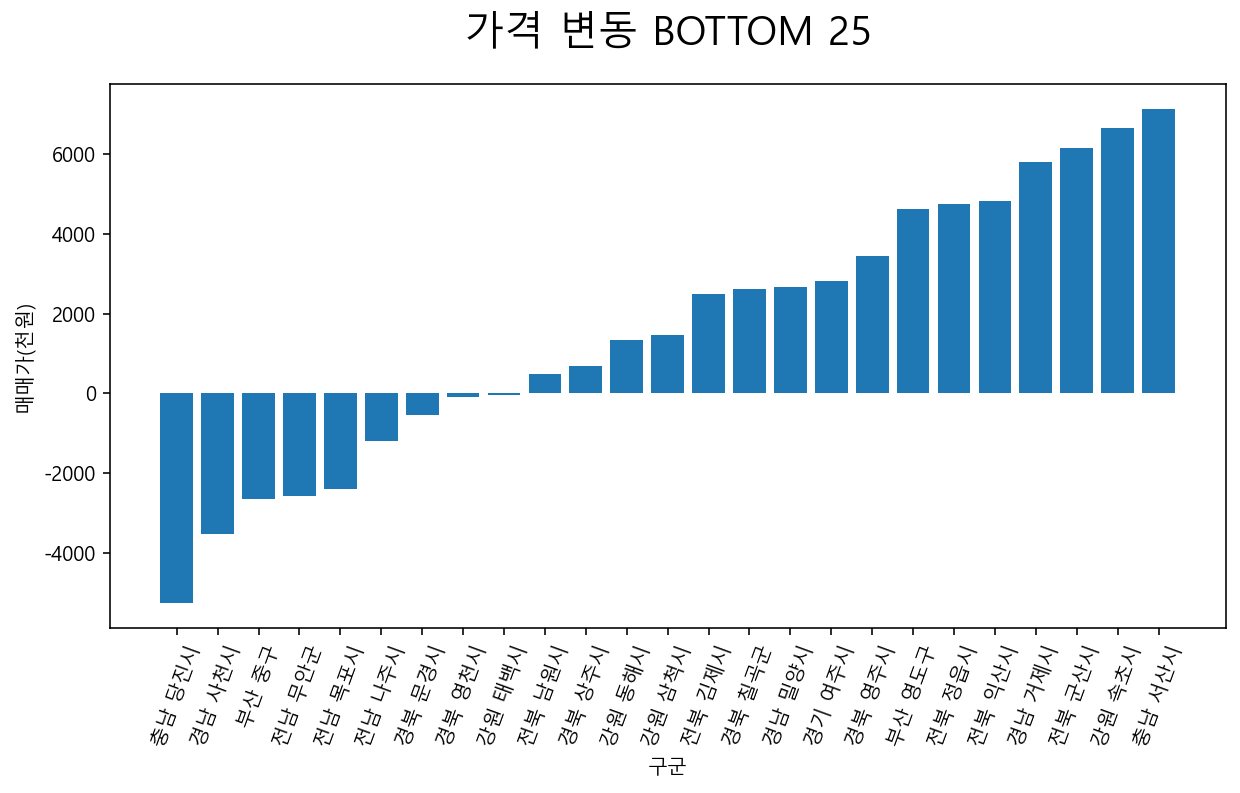

In [182]:
# 차트 그리기

# 그래프 크기
plt.figure(figsize=(10,5))

# 막대그래프
plt.bar(tmp['시도'] + ' ' + tmp['구군'], tmp['증가액'])

# 차트 제목
plt.title('가격 변동 BOTTOM 25', fontsize=20, pad=20)

# 축의 tick 포멧 편집
plt.ticklabel_format(axis='y', style='plain')

# x축 레이블 회전 - x 축 값을 기울여 표시
plt.xticks(rotation=70) 

# 라벨
plt.xlabel('구군')
plt.ylabel('매매가(천원)')

plt.show()

**4) (추가) 2021년 7월 아파트 평균 매매가 TOP 25**

In [190]:
# 분석 대상 열 지정
apart3 = apart[['시도', '구군', '2021-07']]

# 2021년 7월 순 정렬
tmp = apart3.sort_values(by='2021-07', ascending=False)

# 인덱스 초기화
tmp.reset_index(drop=True, inplace=True)

# TOP 25 개
tmp = tmp.head(25)

# 확인
print(tmp.head())

   시도   구군  2021-07
0  서울  서초구  1873390
1  서울  강남구  1818801
2  서울  용산구  1445073
3  경기  과천시  1368271
4  서울  송파구  1341981


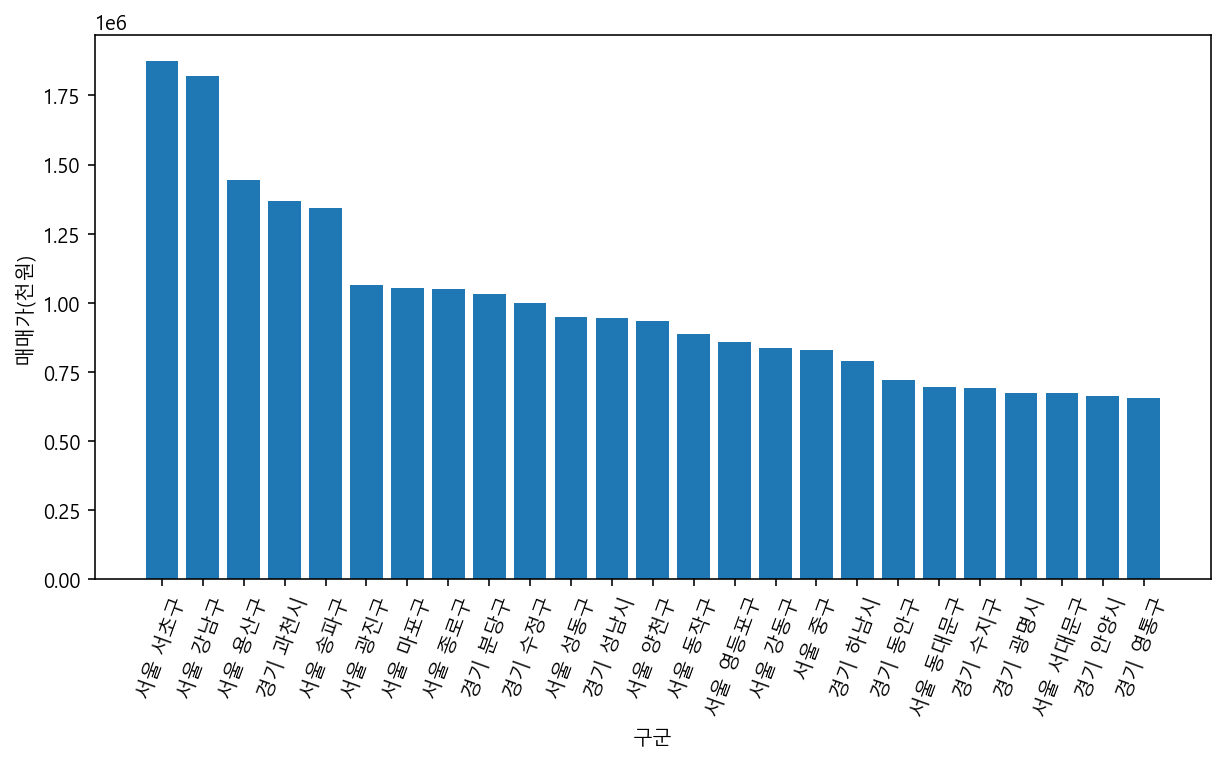

In [192]:
# 차트 그리기

# 그래프 크기
plt.figure(figsize=(10, 5))

# x축, y축
plt.bar(tmp['시도'] + ' ' + tmp['구군'], tmp['2021-07'])

# 라벨
plt.xlabel('구군')
plt.ylabel('매매가(천원)')

# x축 레이블 회전 - x 축 값을 기울여 표시
plt.xticks(rotation=70)

# x
plt.show()

### 4.2.부산 지역 분석

**1) 부산 지역 데이터 추출**

- apart2 데이터프레임에서 부산지역 데이터만 추출해 새로운 데이터프레임을 선언합니다.

In [146]:
# 데이터프레임 만들기
busan = apart2.loc[apart2['시도'].isin(['부산']) , : ]

# 인덱스 초기화 & 1 번 부터 index 시작
busan.reset_index(drop=True, inplace=True)
busan.index=busan.index+1

# 확인
busan.head()

,시도,구군,증가액,증가율
1,부산,중구,-2645,-1.795253
2,부산,서구,29916,11.009053
3,부산,동구,20139,9.783480
4,부산,영도구,4625,2.358286
5,부산,부산진구,41122,15.904669


**2) 부산 지역 가격 변동 현황**

- 부산 지역 아파트 매매가 증가액을 막대 그래프로 시각화해 확인합니다.

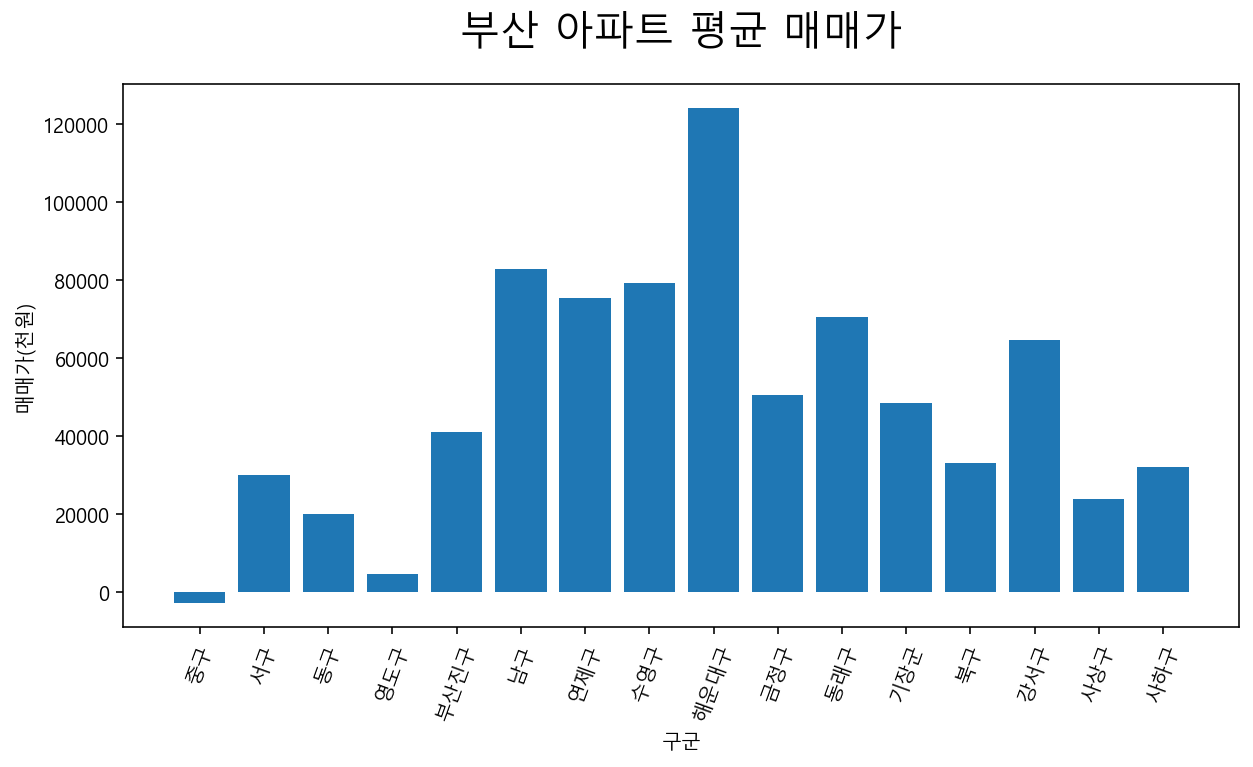

In [147]:
# 부산 지역 가격 변동

# 그래프 크기
plt.figure(figsize=(10,5))

# 막대그래프
plt.bar(busan['구군'], busan['증가액'])

# 차트 제목
plt.title('부산 아파트 평균 매매가', fontsize=20, pad=20)

# 축의 tick 포멧 편집
plt.ticklabel_format(axis='y', style='plain')

# x 축 값을 기울여 표시
plt.xticks(rotation=70) 

# 라벨
plt.xlabel('구군')
plt.ylabel('매매가(천원)')

plt.show()

**3) 부산 지역 가격 변동 순위**

- 아파트 매매가 증가액을 기준으로 내림차순 정렬해 tmp 데이터프레임을 선언합니다.
- tmp 데이터프레임을 대상으로 다시 시각화해 확인합니다.

   시도    구군     증가액        증가율
1  부산  해운대구  123977  30.789194
2  부산    남구   82844  23.103159
3  부산   수영구   79132  18.347790
4  부산   연제구   75416  21.189210
5  부산   동래구   70500  19.885146


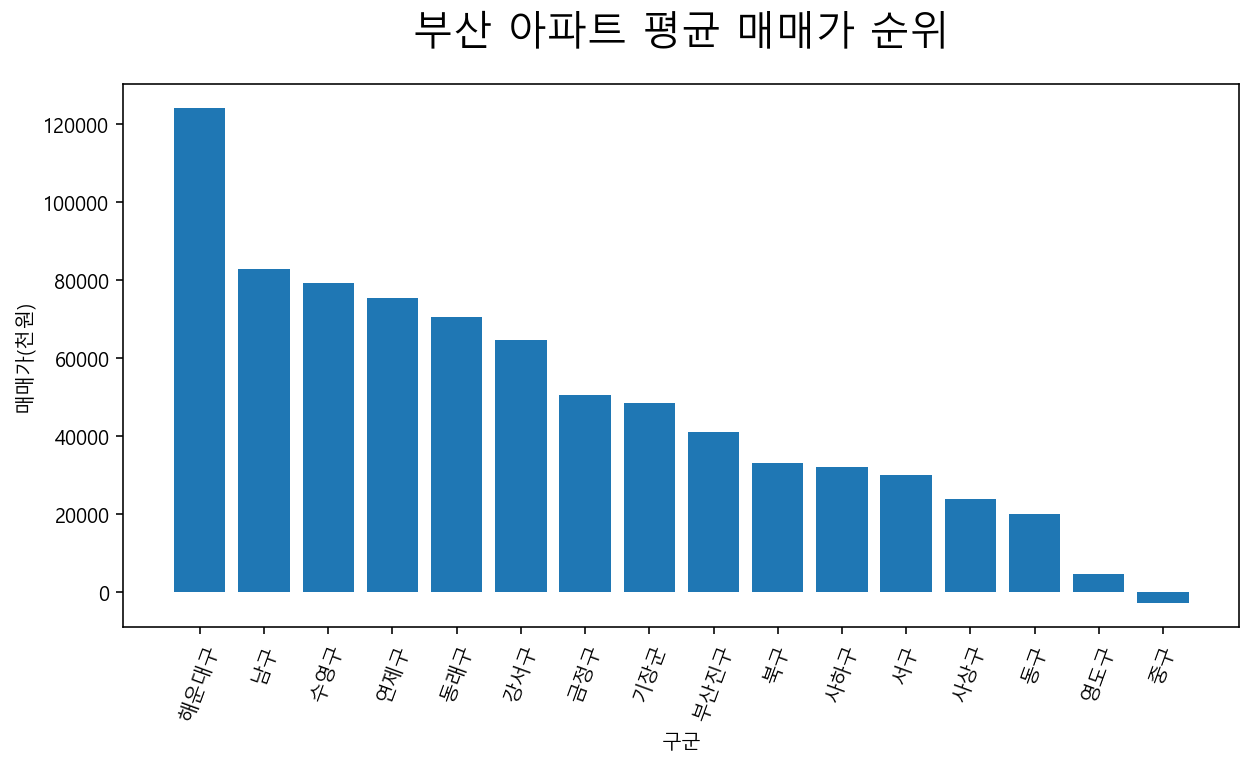

In [183]:
# 아파트 매매가 증가액을 기준으로 내림차순 정렬
tmp = busan.sort_values(by='증가액', ascending=False)

# 인덱스 초기화 & 1 번 부터 index 시작
tmp.reset_index(drop=True, inplace=True)
tmp.index=tmp.index+1

# 확인
print(tmp.head())




### 시각화 ###


# 그래프 크기
plt.figure(figsize=(10,5))

# 막대그래프
plt.bar(tmp['구군'], tmp['증가액'])

# 차트 제목
plt.title('부산 아파트 평균 매매가 순위', fontsize=20, pad=20)

# 축의 tick 포멧 편집
plt.ticklabel_format(axis='y', style='plain')

# x 축 값을 기울여 표시
plt.xticks(rotation=70) 

# 라벨
plt.xlabel('구군')
plt.ylabel('매매가(천원)')

plt.show()

### 4.2.서울 지역 분석

**1) 서울 지역 데이터 추출**

- apart2 데이터프레임에서 서울지역 데이터만 추출해 seoul 데이터프레임을 선언합니다.

In [194]:
# seoul 데이터프레임 만들기
seoul = apart2.loc[apart['시도'].isin(['서울']) , :]

# 확인
seoul.head()

,시도,구군,증가액,증가율
0,서울,종로구,21208,2.059945
1,서울,중구,27229,3.394050
2,서울,용산구,45719,3.267150
3,서울,성동구,36441,4.001357
4,서울,광진구,42768,4.188683


**2) 서울 지역 가격 변동 현황**

- 서울 지역 아파트 매매가 증가액을 막대 그래프로 시각화해 확인합니다.

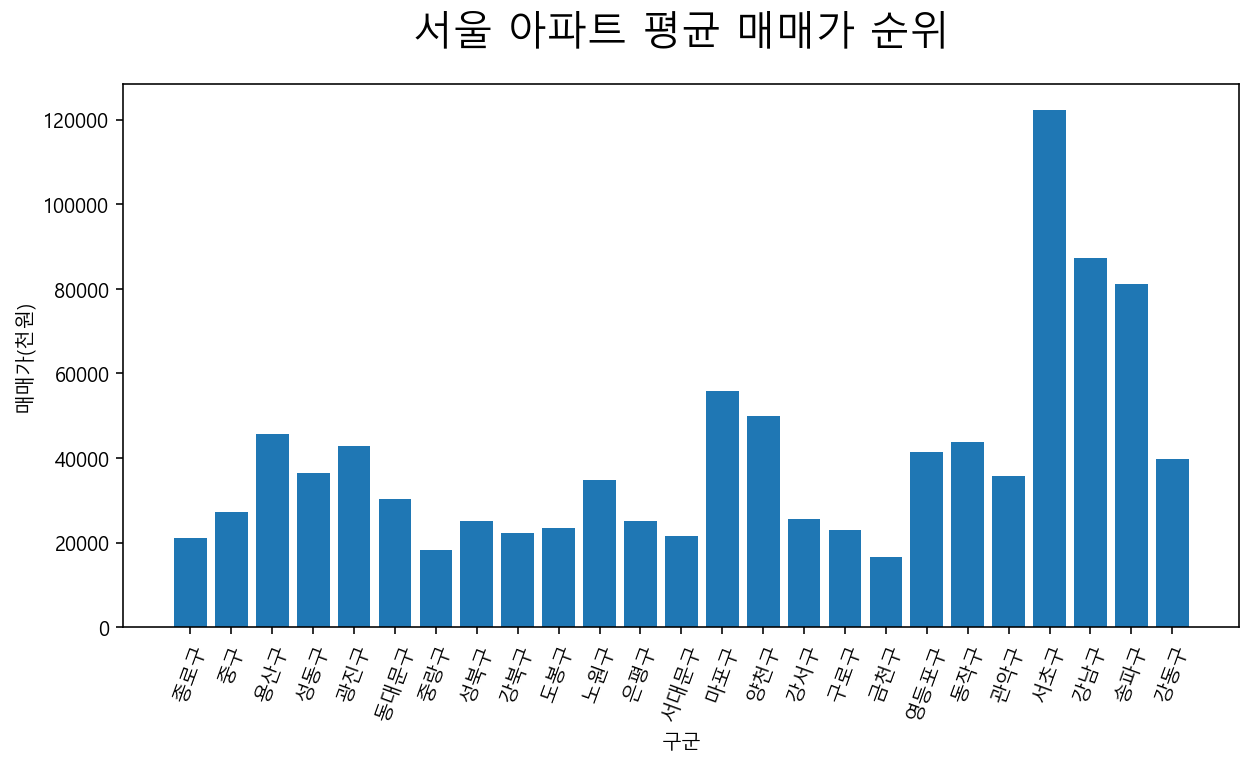

In [196]:
# 서울 지역 가격 변동

# 그래프 크기
plt.figure(figsize=(10,5))

# 막대그래프
plt.bar(seoul['구군'], seoul['증가액'])

# 차트 제목
plt.title('서울 아파트 평균 매매가 순위', fontsize=20, pad=20)

# 축의 tick 포멧 편집
plt.ticklabel_format(axis='y', style='plain')

# x 축 값을 기울여 표시
plt.xticks(rotation=70) 

# 라벨
plt.xlabel('구군')
plt.ylabel('매매가(천원)')

plt.show()

**3) 서울 지역 가격 변동 순위**

- 아파트 매매가 증가액을 기준으로 내림차순 정렬해 tmp 데이터프레임을 선언합니다.
- tmp 데이터프레임을 대상으로 다시 시각화해 확인합니다.

   시도   구군     증가액       증가율
0  서울  서초구  122376  6.988865
1  서울  강남구   87274  5.040291
2  서울  송파구   81143  6.435640
3  서울  마포구   55788  5.584597
4  서울  양천구   49836  5.632141


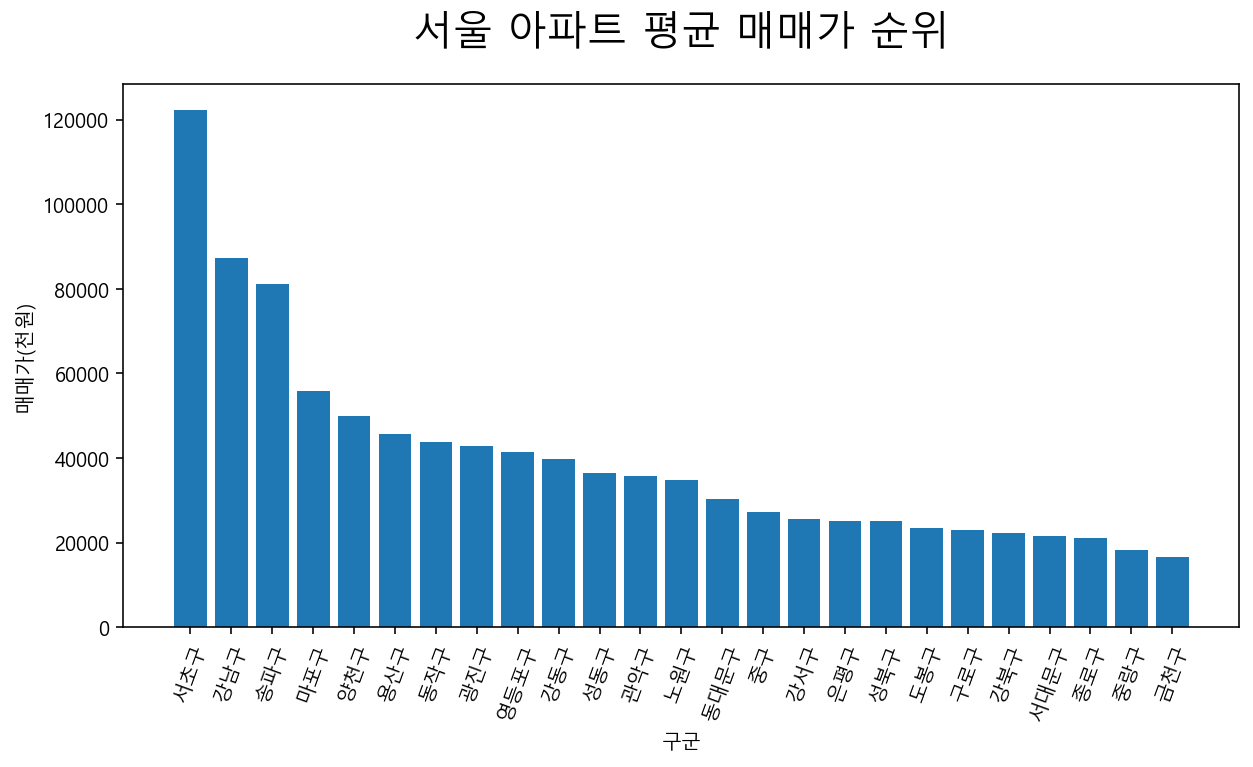

In [198]:
# 서울 지역 아파트 매매가 증가액을 기준으로 내림차순 정렬
tmp = seoul.sort_values(by='증가액', ascending=False)

# 인덱스 초기화 
tmp.reset_index(drop=True, inplace=True)

# 확인
print(tmp.head())



## 시각화 ##

# 그래프 크기
plt.figure(figsize=(10,5))

# 막대그래프
plt.bar(tmp['구군'], tmp['증가액'])

# 차트 제목
plt.title('서울 아파트 평균 매매가 순위', fontsize=20, pad=20)

# 축의 tick 포멧 편집
plt.ticklabel_format(axis='y', style='plain')

# x 축 값을 기울여 표시
plt.xticks(rotation=70) 

# 라벨
plt.xlabel('구군')
plt.ylabel('매매가(천원)')

plt.show()

## 5.정리

- 분석을 통해 확인한 내용을 정리합니다.

**1) 의견**

-  전국적으로 경기 동안구, 의왕시 아파트 증가액 폭이 가장 컸습니다.
-  전국적으로 충남 당진시, 경남 사천시 아파트 증가액 폭이 가장 작았습니다.
-  부산광역시의 데이터를 살펴보았고, 해운대구가 아파트 증가액폭이 가장 컸습니다.

**2) 기타**

- 데이터 정리 및 그래프 연습이 필요하다고 느낌!
- 
- 
- 
- 
